# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [3]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

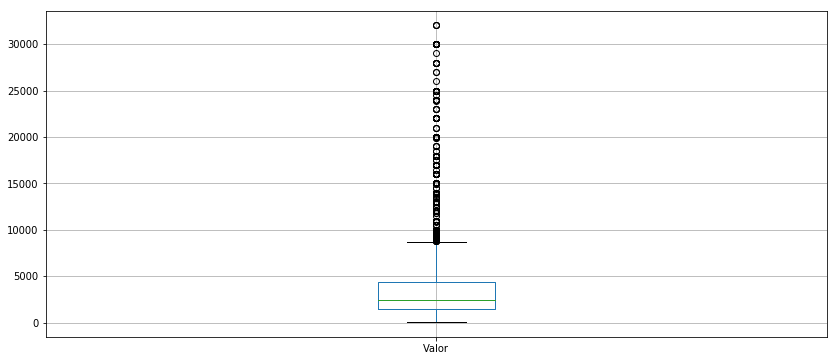

In [4]:
dados.boxplot(['Valor'])

In [6]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Valor m²


In [8]:
valor = dados['Valor']

In [14]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q1 + 1.5 * IIQ

In [12]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

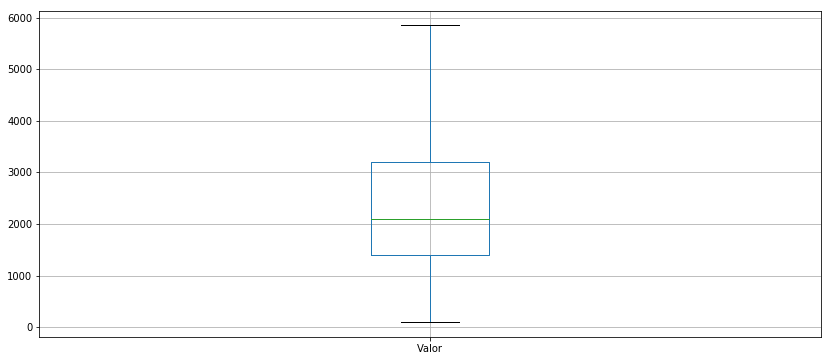

In [13]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2B259CAC8>]],
      dtype=object)

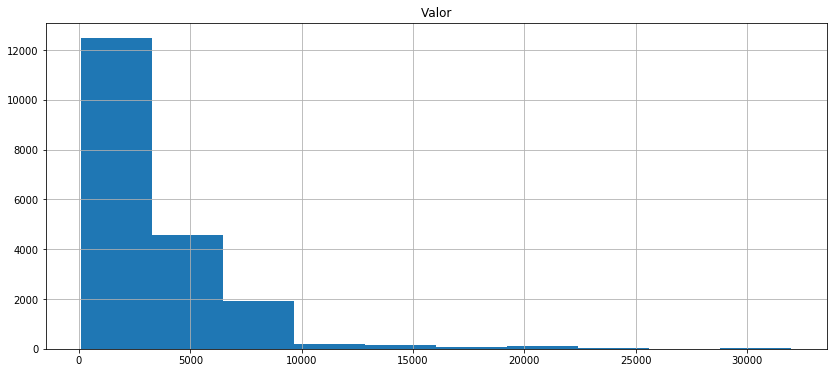

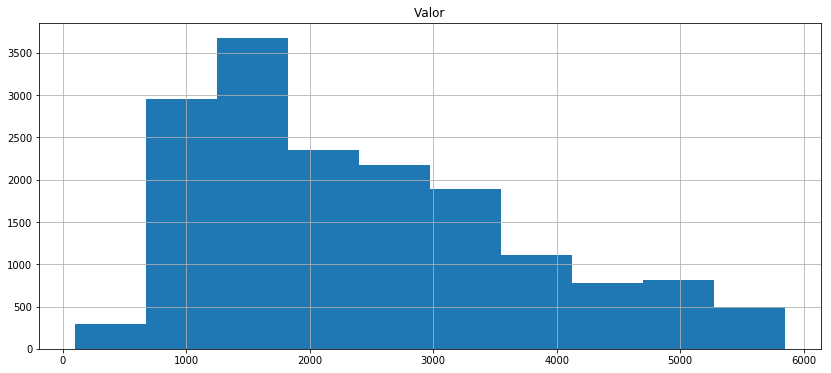

In [15]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e Removendo Outliers (Continuação)

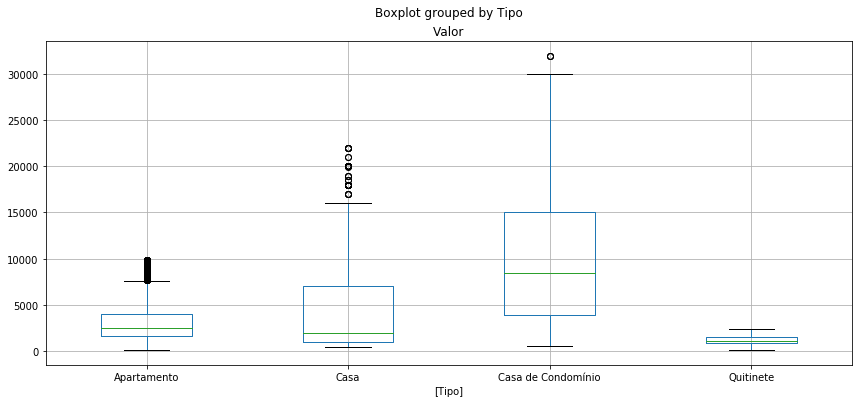

In [16]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [20]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [21]:
type(grupo_tipo)

pandas.core.groupby.groupby.SeriesGroupBy

In [22]:
grupo_tipo.groups

{'Apartamento': Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             16913, 16914, 16915, 16916, 16917, 16918, 16919, 16920, 16921,
             16922],
            dtype='int64', length=16923),
 'Casa': Int64Index([16923, 16924, 16925, 16926, 16927, 16928, 16929, 16930, 16931,
             16932,
             ...
             17811, 17812, 17813, 17814, 17815, 17816, 17817, 17818, 17819,
             17820],
            dtype='int64', length=898),
 'Casa de Condomínio': Int64Index([17821, 17822, 17823, 17824, 17825, 17826, 17827, 17828, 17829,
             17830,
             ...
             18775, 18776, 18777, 18778, 18779, 18780, 18781, 18782, 18783,
             18784],
            dtype='int64', length=964),
 'Quitinete': Int64Index([18785, 18786, 18787, 18788, 18789, 18790, 18791, 18792, 18793,
             18794,
             ...
             19588, 19589, 19590, 19591, 19592, 19593, 19594, 19595, 19596,
 

In [23]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q1 + 1.5 * IIQ

In [24]:
Q1

Tipo
Apartamento           1600.0
Casa                  1000.0
Casa de Condomínio    3900.0
Quitinete              900.0
Name: Valor, dtype: float64

In [25]:
Q3

Tipo
Apartamento            4000.0
Casa                   7000.0
Casa de Condomínio    15000.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [26]:
IIQ

Tipo
Apartamento            2400.0
Casa                   6000.0
Casa de Condomínio    11100.0
Quitinete               600.0
Name: Valor, dtype: float64

In [27]:
limite_inferior

Tipo
Apartamento           -2000.0
Casa                  -8000.0
Casa de Condomínio   -12750.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [28]:
limite_superior

Tipo
Apartamento            5200.0
Casa                  10000.0
Casa de Condomínio    20550.0
Quitinete              1800.0
Name: Valor, dtype: float64

In [32]:
limite_superior['Apartamento']

5200.0

In [35]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

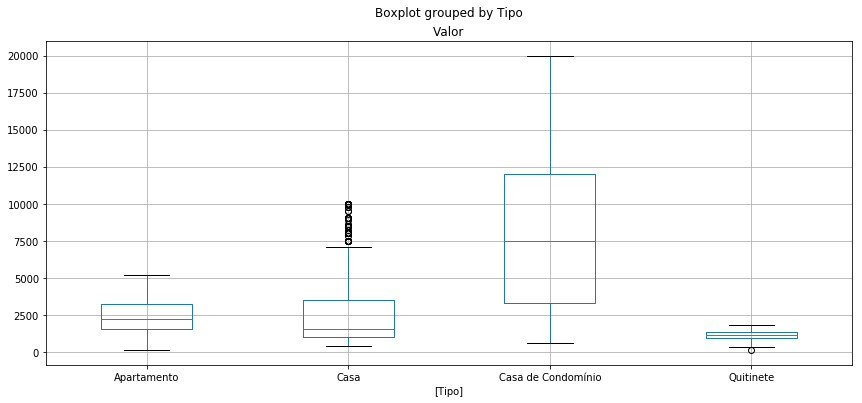

In [36]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [37]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)